In [ ]:
import pandas as pd

In [ ]:
data1 = pd.read_csv("/content/drive/MyDrive/Kaggle_1/playground-series-s3e2/train.csv")
#data1.drop(data1.columns[data1.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [ ]:
data1 = data1.drop("id", axis =1)

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15304 entries, 0 to 15303
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             15304 non-null  object 
 1   age                15304 non-null  float64
 2   hypertension       15304 non-null  int64  
 3   heart_disease      15304 non-null  int64  
 4   ever_married       15304 non-null  object 
 5   work_type          15304 non-null  object 
 6   Residence_type     15304 non-null  object 
 7   avg_glucose_level  15304 non-null  float64
 8   bmi                15304 non-null  float64
 9   smoking_status     15304 non-null  object 
 10  stroke             15304 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 1.3+ MB


In [ ]:
data1.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000
mean,41.417708,0.049726,0.023327,89.039853,28.112721,0.041296
std,21.444673,0.217384,0.150946,25.476102,6.722315,0.198981
min,0.080000,0.000000,0.000000,55.220000,10.300000,0.000000
25%,26.000000,0.000000,0.000000,74.900000,23.500000,0.000000
50%,43.000000,0.000000,0.000000,85.120000,27.600000,0.000000
75%,57.000000,0.000000,0.000000,96.980000,32.000000,0.000000
max,82.000000,1.000000,1.000000,267.600000,80.100000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff00340d310>,
      dtype=object)

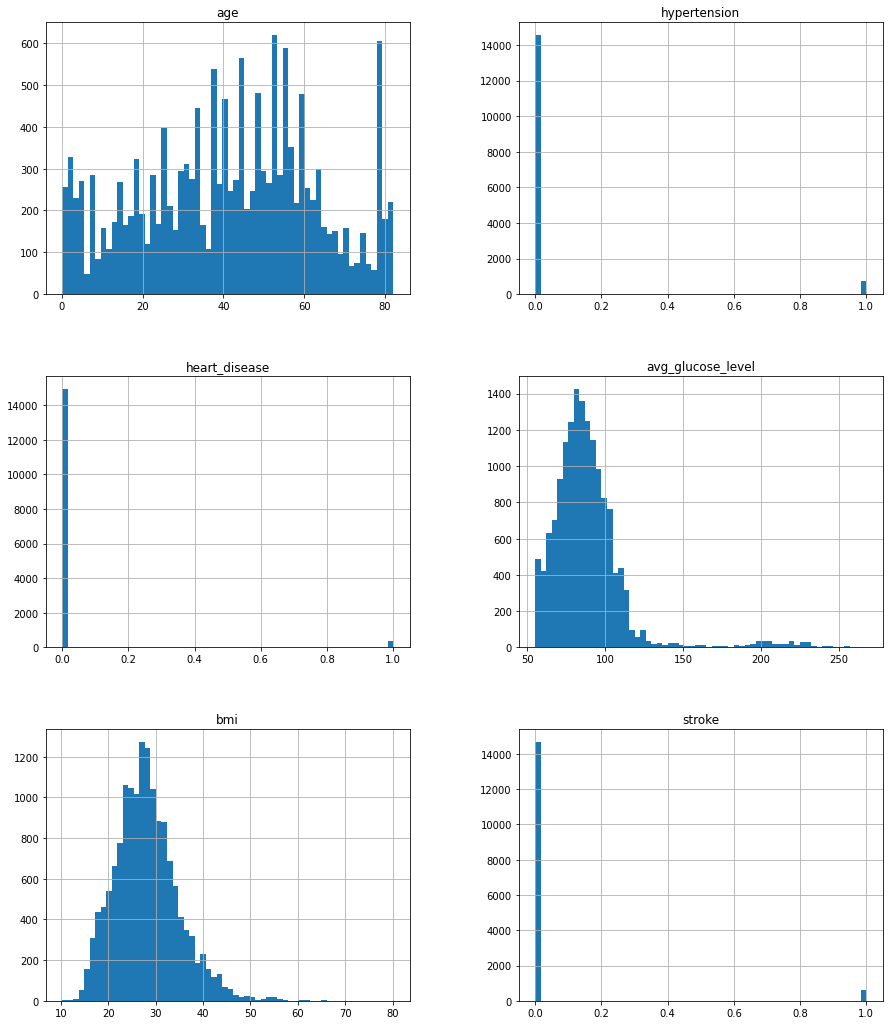

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
data1.hist(bins=60,column=data1.columns,figsize=(15,18))

In [ ]:
X = data1.drop("stroke", axis =1)
y = data1["stroke"]

In [ ]:
test = pd.read_csv("/content/drive/MyDrive/Kaggle_1/playground-series-s3e2/test.csv")

In [ ]:
subm = pd.read_csv("/content/drive/MyDrive/Kaggle_1/playground-series-s3e2/sample_submission.csv")

## New Section

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

from sklearn.model_selection import KFold, StratifiedKFold, RepeatedKFold
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV


In [ ]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

import tensorflow as tf
import tensorflow_addons as tfa
import tensorflow.keras.layers as layers
import tensorflow.keras.regularizers as reg
from sklearn.linear_model import LogisticRegression, LassoCV
from lightgbm.sklearn import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import accuracy_score, roc_auc_score, f1_score

In [ ]:
train_df = data1
test_df = test

In [ ]:
x_full = train_df.copy()
y_full = x_full.pop('stroke').to_numpy()


num_cols = ["age", "avg_glucose_level", "bmi"]
cat_cols = x_full.columns.difference(num_cols)
print(cat_cols)

num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

tr = ColumnTransformer([
    ("num", num_pipe, num_cols),
    ("cat", OneHotEncoder(drop="first"), cat_cols),
])

x_full = tr.fit_transform(x_full)
x_test = tr.transform(test_df)


print("train shape = ", x_full.shape)
print("test shape = ", x_test.shape)

Index(['Residence_type', 'ever_married', 'gender', 'heart_disease',
       'hypertension', 'smoking_status', 'work_type'],
      dtype='object')
train shape =  (15304, 16)
test shape =  (10204, 16)


In [ ]:
pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow_addons as tfa
import tensorflow as tf
def get_model():
    d = 0.1
    model = tf.keras.models.Sequential([
        layers.Dense(256, activation='relu'),
        layers.Dropout(d),
        layers.Dense(128, activation='relu'),
        layers.Dropout(d),
        layers.Dense(64, activation='relu'),
        layers.Dropout(d),
        layers.Dense(1, activation='sigmoid'),
    ])
    model.compile(
        optimizer=tf.keras.optimizers.Adam(),
        loss=tfa.losses.SigmoidFocalCrossEntropy(alpha=0.80, gamma=2.0),
        metrics="AUC"
    )
    return model



In [ ]:
plat = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_auc", mode='max', patience=3, factor=0.1, min_lr=1e-6, min_delta=0.0001)
es = tf.keras.callbacks.EarlyStopping(monitor="val_auc", mode='max', patience=7, min_delta=0.0001, restore_best_weights = True)

In [ ]:
import tensorflow.keras.layers as layers
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score

In [ ]:
models = []
scores = []
skf = StratifiedKFold(n_splits=12, shuffle=True)


for train_index, val_index in skf.split(x_full, y_full):
    x_train, x_val = x_full[train_index], x_full[val_index]
    y_train, y_val = y_full[train_index], y_full[val_index]
    
    model = get_model()
    h = model.fit(
        x_train, y_train,
        validation_data = (x_val, y_val),
        epochs = 100,
        batch_size = 60,
        callbacks = [plat, es],
        class_weight = { 0: 1.0, 1: 10.0, },
        verbose=False
    ).history
    
    s = roc_auc_score(y_val, model.predict(x_val))
    print(f"Best val auc: {s:.4f}")
    scores.append(s)
    models.append(model)
print(f'mean scores:  {np.mean(scores):.4f}')

40/40 [==============================] - 0s 3ms/step
Best val auc: 0.8780
40/40 [==============================] - 0s 2ms/step
Best val auc: 0.9033
40/40 [==============================] - 0s 1ms/step
Best val auc: 0.8825
40/40 [==============================] - 0s 1ms/step
Best val auc: 0.8736
40/40 [==============================] - 0s 1ms/step
Best val auc: 0.9019
40/40 [==============================] - 0s 2ms/step
Best val auc: 0.8364
40/40 [==============================] - 0s 2ms/step
Best val auc: 0.9224
40/40 [==============================] - 0s 2ms/step
Best val auc: 0.8990
40/40 [==============================] - 0s 1ms/step
Best val auc: 0.8986
40/40 [==============================] - 0s 2ms/step
Best val auc: 0.8844
40/40 [==============================] - 0s 2ms/step
Best val auc: 0.8791
40/40 [==============================] - 0s 2ms/step
Best val auc: 0.8688
mean scores:  0.8857


In [ ]:

test_preds = []

for model in models:
    preds = model.predict(x_test)
    test_preds.append(preds)


319/319 [==============================] - 0s 1ms/step


In [ ]:
test_preds = np.array(test_preds).mean(0)

In [ ]:
subm['stroke'] = test_preds
subm.to_csv("/content/drive/MyDrive/Kaggle_1/playground-series-s3e2/submission.csv", index=False)

## New Section1

In [ ]:
print(data1["gender"].unique())
print(data1["gender"].value_counts())

['Male' 'Female' 'Other']
Female    9446
Male      5857
Other        1
Name: gender, dtype: int64


In [ ]:
print(data1["ever_married"].unique())
print(data1["ever_married"].value_counts())

['Yes' 'No']
Yes    10385
No      4919
Name: ever_married, dtype: int64


In [ ]:
print(data1["work_type"].unique())
print(data1["work_type"].value_counts())

['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Private          9752
children         2038
Self-employed    1939
Govt_job         1533
Never_worked       42
Name: work_type, dtype: int64


In [ ]:
print(data1["Residence_type"].unique())
print(data1["Residence_type"].value_counts())

['Urban' 'Rural']
Rural    7664
Urban    7640
Name: Residence_type, dtype: int64


In [ ]:
print(data1["smoking_status"].unique())
print(data1["smoking_status"].value_counts())

['never smoked' 'formerly smoked' 'Unknown' 'smokes']
never smoked       6281
Unknown            4543
formerly smoked    2337
smokes             2143
Name: smoking_status, dtype: int64


In [ ]:
one_hot_encoded_data = pd.get_dummies(data1, columns = ['gender', 'ever_married','work_type','Residence_type','smoking_status'])
print(one_hot_encoded_data)


        age  hypertension  heart_disease  avg_glucose_level   bmi  stroke  \
0      28.0             0              0              79.53  31.1       0   
1      33.0             0              0              78.44  23.9       0   
2      42.0             0              0             103.00  40.3       0   
3      56.0             0              0              64.87  28.8       0   
4      24.0             0              0              73.36  28.8       0   
...     ...           ...            ...                ...   ...     ...   
15299  22.0             0              0              72.63  19.5       0   
15300  46.0             1              0             101.19  32.1       0   
15301  75.0             0              0              87.69  26.2       0   
15302  46.0             0              0             101.13  22.5       0   
15303  14.0             0              0              85.12  24.7       0   

       gender_Female  gender_Male  gender_Other  ever_married_No  ...  \
0 

In [ ]:
one_hot_encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15304 entries, 0 to 15303
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             15304 non-null  float64
 1   hypertension                    15304 non-null  int64  
 2   heart_disease                   15304 non-null  int64  
 3   avg_glucose_level               15304 non-null  float64
 4   bmi                             15304 non-null  float64
 5   stroke                          15304 non-null  int64  
 6   gender_Female                   15304 non-null  uint8  
 7   gender_Male                     15304 non-null  uint8  
 8   gender_Other                    15304 non-null  uint8  
 9   ever_married_No                 15304 non-null  uint8  
 10  ever_married_Yes                15304 non-null  uint8  
 11  work_type_Govt_job              15304 non-null  uint8  
 12  work_type_Never_worked          

In [ ]:
one_hot = one_hot_encoded_data.drop(["gender_Female",'gender_Other'],axis =1)

In [ ]:
one_hot_encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15304 entries, 0 to 15303
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             15304 non-null  float64
 1   hypertension                    15304 non-null  int64  
 2   heart_disease                   15304 non-null  int64  
 3   avg_glucose_level               15304 non-null  float64
 4   bmi                             15304 non-null  float64
 5   stroke                          15304 non-null  int64  
 6   gender_Female                   15304 non-null  uint8  
 7   gender_Male                     15304 non-null  uint8  
 8   gender_Other                    15304 non-null  uint8  
 9   ever_married_No                 15304 non-null  uint8  
 10  ever_married_Yes                15304 non-null  uint8  
 11  work_type_Govt_job              15304 non-null  uint8  
 12  work_type_Never_worked          

In [ ]:
X = one_hot.drop(["stroke"],axis = 1)
y = one_hot["stroke"]

In [ ]:
one_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15304 entries, 0 to 15303
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             15304 non-null  float64
 1   hypertension                    15304 non-null  int64  
 2   heart_disease                   15304 non-null  int64  
 3   avg_glucose_level               15304 non-null  float64
 4   bmi                             15304 non-null  float64
 5   stroke                          15304 non-null  int64  
 6   gender_Male                     15304 non-null  uint8  
 7   ever_married_No                 15304 non-null  uint8  
 8   ever_married_Yes                15304 non-null  uint8  
 9   work_type_Govt_job              15304 non-null  uint8  
 10  work_type_Never_worked          15304 non-null  uint8  
 11  work_type_Private               15304 non-null  uint8  
 12  work_type_Self-employed         

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
X_train.shape


(12243, 19)

In [ ]:
y_train.shape

(12243,)

In [ ]:
X_test.shape

(3061, 19)

In [ ]:
y_test.shape

(3061,)

In [ ]:
import numpy as np

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,X_train,y_train, scoring="neg_mean_squared_error",cv =9)
rmse_scores = np.sqrt(-scores)


In [ ]:
rmse_scores

array([0.187924  , 0.20070724, 0.202638  , 0.17646613, 0.17192573,
       0.19123034, 0.2074004 , 0.19941753, 0.18305516])

In [ ]:
rmse_scores.mean()

0.1911960590590549

In [ ]:
rmse_scores.std()

0.01162780326358069

In [ ]:
import math
import numpy as np
housing_predictions = model.predict(X_train)
MSE = np.square((np.subtract(y_train, housing_predictions))).mean()

RMSE = math.sqrt(MSE)
print("Mean Square Error:\n")
print((MSE))

Mean Square Error:

0.005077758719268154


OR

In [ ]:
from sklearn.metrics import mean_squared_error
Train_MSE = mean_squared_error(y_train,housing_predictions)
print(Train_MSE)

0.005077758719268154


Testing Phase:


In [ ]:
from sklearn.metrics import mean_squared_error
final_predictions  = model.predict(X_test)
final_MSE = mean_squared_error(y_test, final_predictions)
final_RMSE = np.sqrt(final_MSE)

In [ ]:
final_MSE

0.038374126102580855

In [ ]:
from sklearn.metrics import r2_score
print("R2 score : %.2f" % r2_score(y_test,final_predictions))

R2 score : 0.06


In [ ]:
subm.shape


(10204, 2)

In [ ]:
final_predictions.shape

(3061,)

In [ ]:
test.shape

(10204, 11)

In [ ]:
one_data1 = pd.get_dummies(test, columns = ['gender', 'ever_married','work_type','Residence_type','smoking_status'])
print(one_data1)

In [ ]:
one_hot1 = one_data1.drop(["gender_Female",'gender_Other','id'],axis =1)

In [ ]:
one_hot1

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,57.0,0,0,82.54,33.4,0,0,1,0,0,1,0,0,1,0,1,0,0,0
1,70.0,1,0,72.06,28.5,1,0,1,0,0,1,0,0,0,1,1,0,0,0
2,5.0,0,0,103.72,19.5,0,1,0,0,0,0,0,1,0,1,1,0,0,0
3,56.0,0,0,69.24,41.4,0,0,1,1,0,0,0,0,0,1,0,0,0,1
4,32.0,0,0,111.15,30.1,1,0,1,0,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10199,27.0,0,0,75.77,17.6,0,1,0,0,0,1,0,0,0,1,0,0,1,0
10200,49.0,0,0,102.91,26.7,1,0,1,0,0,1,0,0,0,1,1,0,0,0
10201,3.0,0,0,104.04,18.3,0,1,0,0,0,0,0,1,1,0,1,0,0,0
10202,31.0,0,0,82.41,28.7,1,0,1,0,0,1,0,0,0,1,0,0,1,0


In [ ]:
predic = model.predict(one_hot1)

In [ ]:
predic.shape

(10204,)

In [ ]:
subm.shape

(10204, 2)

In [ ]:
subm['stroke'] = predic
subm.to_csv("/content/drive/MyDrive/Kaggle_1/playground-series-s3e2/submission1_0.csv", index=False)

## LAsso

In [ ]:
from sklearn.linear_model import LassoCV

In [ ]:
lasso_cv = LassoCV(cv=9)
#
# Fit the Lasso model
#
lasso_cv.fit(X_train,y_train)
#
# Create the model score
#

LassoCV(cv=9)

In [ ]:
lasso_cv.score(X_test, y_test), lasso_cv.score(X_train, y_train)

(0.11206086357397349, 0.10251671638667093)

In [ ]:
from sklearn.metrics import mean_squared_error
final_predictions  = lasso_cv.predict(X_test)
final_MSE = mean_squared_error(y_test, final_predictions)
final_RMSE = np.sqrt(final_MSE)

In [ ]:
final_MSE

0.036109020658396225

In [ ]:
from sklearn.metrics import r2_score
print("R2 score : %.2f" % r2_score(y_test,final_predictions))

R2 score : 0.11


In [ ]:
predic = lasso_cv.predict(one_hot1)

In [ ]:
subm['stroke'] = predic
subm.to_csv("/content/drive/MyDrive/Kaggle_1/playground-series-s3e2/submission_lasso.csv", index=False)

### Catboost

In [ ]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 9.0 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor


In [ ]:
model1 = CatBoostRegressor(loss_function="RMSE")

In [ ]:
import catboost as cb

In [ ]:
train_dataset = cb.Pool(X_train, y_train) 
test_dataset = cb.Pool(X_test, y_test)

In [ ]:
grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.03, 0.1],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}
model1.grid_search(grid, train_dataset)

In [ ]:
pred = model1.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, pred)))
r2 = r2_score(y_test, pred)
print("Testing performance")
print("RMSE: {:.2f}".format(rmse))
print("R2: {:.2f}".format(r2))

Testing performance
RMSE: 0.19
R2: 0.12


In [ ]:
pred.shape

(3061,)

In [ ]:
predic1 = model1.predict(one_hot1)

In [ ]:
subm['stroke'] = predic1
subm.to_csv("/content/drive/MyDrive/Kaggle_1/playground-series-s3e2/submission_catboost.csv", index=False)

## Neural Networks.

In [ ]:
# importing the libraries
from keras.models import Sequential
from keras.layers import Dense

# create ANN model
model = Sequential()

# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=5, input_dim=19, kernel_initializer='normal', activation='relu'))

# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))

# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))

# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 20, epochs = 50, verbose=1)

Epoch 1/50
613/613 [==============================] - 2s 2ms/step - loss: 0.0376
Epoch 2/50
613/613 [==============================] - 1s 2ms/step - loss: 0.0361
Epoch 3/50
613/613 [==============================] - 1s 2ms/step - loss: 0.0359
Epoch 4/50
613/613 [==============================] - 1s 2ms/step - loss: 0.0357
Epoch 5/50
613/613 [==============================] - 1s 2ms/step - loss: 0.0356
Epoch 6/50
613/613 [==============================] - 1s 2ms/step - loss: 0.0354
Epoch 7/50
613/613 [==============================] - 1s 2ms/step - loss: 0.0355
Epoch 8/50
613/613 [==============================] - 1s 2ms/step - loss: 0.0354
Epoch 9/50
613/613 [==============================] - 1s 2ms/step - loss: 0.0353
Epoch 10/50
613/613 [==============================] - 1s 2ms/step - loss: 0.0352
Epoch 11/50
613/613 [==============================] - 1s 2ms/step - loss: 0.0352
Epoch 12/50
613/613 [==============================] - 1s 2ms/step - loss: 0.0352
Epoch 13/50
613/613 [====

In [ ]:
# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 15, epochs = 5, verbose=0)

# Generating Predictions on testing data
Predictions=model.predict(X_test)


96/96 [==============================] - 0s 1ms/step


In [ ]:
pred = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, pred)))
r2 = r2_score(y_test, pred)
print("Testing performance")
print("RMSE: {:.2f}".format(rmse))
print("R2: {:.2f}".format(r2))

96/96 [==============================] - 0s 1ms/step
Testing performance
RMSE: 0.19
R2: 0.11


In [ ]:
predic1 = model.predict(one_hot1)

319/319 [==============================] - 1s 3ms/step


In [ ]:
subm['stroke'] = predic1
subm.to_csv("/content/drive/MyDrive/Kaggle_1/playground-series-s3e2/submission_Network.csv", index=False)